#Visual Processing in Toads

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math




In [116]:
# create a class of cell type
# attributes are their name and weight
class cell_type:
  def __init__(self, name, weight):
    self.name = name
    self.weight = weight
    

  # function weight to calculate the weight of each cell type
  # input: the cell that acts on current cell
  def weightOfCell(self, input, weight_table):
    for w in weight_table[self.name]:
      if w == input.name:
        self.weight = self.weight + weight_table[self.name][w]*input.weight
    return self.weight

  def weight_(self,input,weight):
    self.weight = self.weight + input.weight*weight
    return self.weight
  


In [117]:
# Initialize the weight table using built-in dictionary
weight_table = {"SP": {"R2": 1, "TH3": -0.1, "GL": 0.5, "SN" : -20}, "LP": {"R2": 1, "SP": 0.6, "TH3": -0.1, "SN": -8.2}, "PY": {"R2": 3.5, "R3":0.3, "R4": 7.0, "SP": 2.0, "LP": 0.56, "TH3": -0.9},
          "TH3": {"R3": 0.3, "R4": 5.0}, "GL": {"R2": 1, "SP": 0.1, "LP": 0.8}, "SN": {"LP": 2.1}}


In [118]:
# a generator to generate the weight of each node (cell type)
# size is measured in degrees from 2-32 degrees
# geometry: H (rectangle moving horizontally); V (rectangle moving vertically) ; S (square moving horizontally)
# angular_velocity between 0-100 degrees/sec

def generator(size, geometry, angular_velocity, cell_type):
  if cell_type.name == "R2":
    cell_type.weight = (angular_velocity**(0.7))
  elif cell_type.name == "R3":
    cell_type.weight = (angular_velocity**(1.2))
  elif cell_type.name == "R4":
    cell_type.weight = (angular_velocity**(1.1))
  if geometry == "V" or geometry == "S": # antiworm-like stimulus, activate with the range of ERF
    if cell_type.name == "R2":
      if 2.0 <= size <= 4: #ERF range
        cell_type.weight = cell_type.weight*math.log2(size)
      elif size > 4:
        if geometry == "V":
          cell_type.weight = cell_type.weight/(math.log10(size))
        else:
          cell_type.weight = cell_type.weight/(math.log10(2*size))
    elif cell_type.name == "R3":
      if 2 <= size <= 4: 
        cell_type.weight = cell_type.weight*math.log10(size)
      if 5 <= size <= 8: #ERF range
        cell_type.weight = 2*cell_type.weight*math.log10(size)
      else:
        if geometry == "V":
          cell_type.weight = cell_type.weight/(4*math.log10(size))
        else:
          cell_type.weight = cell_type.weight/(2*math.log10(size))
    elif cell_type.name == "R4":
      if geometry == "S":
        cell_type.weight = 2*cell_type.weight*math.log10(size)
      else:
        cell_type.weight = cell_type.weight*math.log10(size)
  else:
    if cell_type.name == "R4":
      cell_type.weight = cell_type.weight*math.log10(size)/4
    elif cell_type.name == "R3":
      cell_type.weight = cell_type.weight*math.log10(size)/2
    else:
      cell_type.weight = cell_type.weight*math.log10(size)*2
  return cell_type.weight


In [119]:
# initialize cell types and create the model network 
def graph():
  s  = cell_type("S",1.0)
  r2 = cell_type("R2",1.0)
  r3 = cell_type("R3",1.0)
  r4 = cell_type("R4",1.0)
  Gl = cell_type("GL",1.0)
  sp = cell_type("SP",1.0)
  lp = cell_type("LP",1.0)
  sn = cell_type("SN",1.0)
  py = cell_type("PY",1.0)
  th3= cell_type("TH3",1.0)
  t  = cell_type("T",1.0)
  graph = nx.DiGraph()
  graph.add_weighted_edges_from([(s,r2,1.0),(s,r3,1.0),(s,r4,1.0)]) # source layer
  graph.add_weighted_edges_from([(r2, Gl,1.0),(r2,sp,1.0),(r2,lp,1.0),(r2,py,3.5),(r3,py,0.3),(r3,th3,0.3),(r4,py,7.0),(r4,th3,5.0)]) #retinal layer
  graph.add_weighted_edges_from([(th3,sp,-0.1),(th3,lp,-0.1),(th3,py,-0.9)]) # pretectal layer
  graph.add_weighted_edges_from([(Gl,sp,0.5),(sp,Gl,0.1),(sp,lp,0.6),(sp,py,2.0),(lp,sn,2.1),(lp,py,0.56),(lp,Gl,0.8),(sn,sp,-20.0),(sn,lp,-8.2),(py,t,1.0),(th3,t,1.0)]) # optic tectal layer
  return s,t,graph

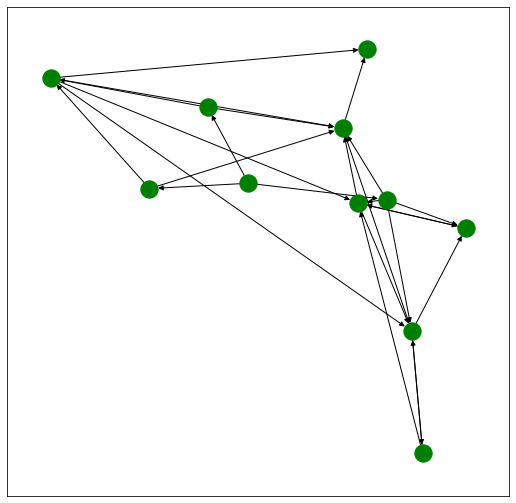

In [120]:
# draw the model network
x,y,model = graph()
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(model, with_labels=False, node_color='green')

In [121]:
# Model prediction 
# angular velocity threshold = 12
size = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # size by degree
geometry = ["H","V","S"] # geometry: H is a worm-like stimulus, V and S are antiworm-like stimulus
angular_velocity = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # angular velocity, increasing velocity -> avoidance behavior
def initialize():
  R2_x = []
  R2_y = []
  R3_x = []
  R3_y = []
  R4_x = []
  R4_y = []
  PY_x = []
  PY_y = []
  TH3_x= []
  TH3_y= []
  return R2_x,R2_y,R3_x,R3_y,R4_x,R4_y,PY_x,PY_y,TH3_x,TH3_y


In [122]:
# Results for R2, R3, R4 responses
# Fix angular_velocity to 7.6
# Fix size to H
R2H_x,R2H_y,R3H_x,R3H_y,R4H_x,R4H_y,PYH_x,PYH_y,TH3H_x,TH3H_y = initialize()
for i in size:
  R2H_x.append(i)
  R3H_x.append(i)
  R4H_x.append(i)
  PYH_x.append(i)
  TH3H_x.append(i)
  input = [i,"H",7.6]
  x,y,network = graph()
  for u,v in network.edges():
    if u.name == "S":
      v.weight = generator(input[0],input[1],input[2],v)
    else:
      if v.name != "T":
        v.weight = v.weightOfCell(u,weight_table)
  
  
  weight_py  = 0.0
  weight_th3 = 0.0
  for u in network.nodes():
    if u.name == "R2":
      R2H_y.append(u.weight)
    if u.name == "R3":
      R3H_y.append(u.weight)
    if u.name == "R4":
      R4H_y.append(u.weight)
    if u.name == "PY":
      weight_py = u.weight
      PYH_y.append(u.weight)
    if u.name == "TH3":
      weight_th3 = u.weight
      TH3H_y.append(u.weight)

  if weight_py > weight_th3:
    print("attack")
  else:
    print("avoid")

attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack


In [123]:
# Results for R2, R3, R4 responses
# Fix angular_velocity to 7.6
# Fix size to V
R2V_x,R2V_y,R3V_x,R3V_y,R4V_x,R4V_y,PYV_x,PYV_y,TH3V_x,TH3V_y = initialize()
for i in size:
  R2V_x.append(i)
  R3V_x.append(i)
  R4V_x.append(i)
  PYV_x.append(i)
  TH3V_x.append(i)
  input = [i,"V",7.6]
  x,y,network = graph()
  for u,v in network.edges():
    if u.name == "S":
      v.weight = generator(input[0],input[1],input[2],v)
    else:
      if v.name != "T":
        v.weight = v.weightOfCell(u,weight_table)
  
  
  weight_py  = 0.0
  weight_th3 = 0.0
  for u in network.nodes():
    if u.name == "R2":
      R2V_y.append(u.weight)
    if u.name == "R3":
      R3V_y.append(u.weight)
    if u.name == "R4":
      R4V_y.append(u.weight)
    if u.name == "PY":
      weight_py = u.weight
      PYV_y.append(u.weight)
    if u.name == "TH3":
      weight_th3 = u.weight
      TH3V_y.append(u.weight)

  if weight_py > weight_th3:
    print("attack")
  else:
    print("avoid")

attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack
attack


In [124]:
# Results for R2, R3, R4 responses
# Fix angular_velocity to 7.6
# Fix size to S
R2S_x,R2S_y,R3S_x,R3S_y,R4S_x,R4S_y,PYS_x,PYS_y,TH3S_x,TH3S_y = initialize()
for i in size:
  R2S_x.append(i)
  R3S_x.append(i)
  R4S_x.append(i)
  PYS_x.append(i)
  TH3S_x.append(i)
  input = [i,"S",7.6]
  x,y,network = graph()
  for u,v in network.edges():
    if u.name == "S":
      v.weight = generator(input[0],input[1],input[2],v)
    else:
      if v.name != "T":
        v.weight = v.weightOfCell(u,weight_table)
  
  
  weight_py  = 0.0
  weight_th3 = 0.0
  for u in network.nodes():
    if u.name == "R2":
      R2S_y.append(u.weight)
    if u.name == "R3":
      R3S_y.append(u.weight)
    if u.name == "R4":
      R4S_y.append(u.weight)
    if u.name == "PY":
      weight_py = u.weight
      PYS_y.append(u.weight)
    if u.name == "TH3":
      weight_th3 = u.weight
      TH3S_y.append(u.weight)
  if weight_py > weight_th3:
    print("attack")
  else:
    print("avoid")

attack
attack
attack
avoid
avoid
avoid
avoid
avoid
avoid
avoid
avoid
avoid
avoid
avoid


In [125]:
def plot_graph(x1,y1,x2,y2,x3,y3,title):
  plt.plot(x1,y1,'r',label = 'H')
  plt.plot(x2,y2,'g', label = 'V')
  plt.plot(x3,y3,'b', label = 'S')
  plt.xlabel('size in degree')
  plt.ylabel('activity responses')
  plt.legend()
  plt.title(title)
  path = title+'.png'
  plt.savefig(path,dpi = 300)
  plt.show()


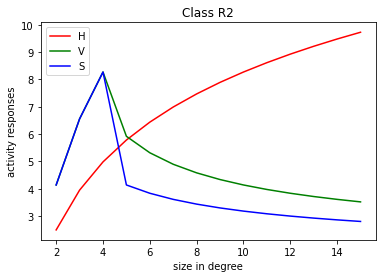

In [126]:
plot_graph(R2H_x,R2H_y,R2V_x,R2V_y,R2S_x,R2S_y,"Class R2")

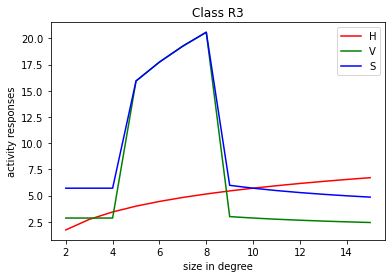

In [127]:
plot_graph(R3H_x,R3H_y,R3V_x,R3V_y,R3S_x,R3S_y,"Class R3")

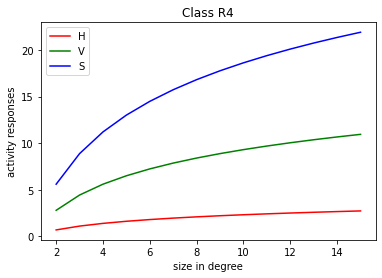

In [128]:
plot_graph(R4H_x,R4H_y,R4V_x,R4V_y,R4S_x,R4S_y,"Class R4")

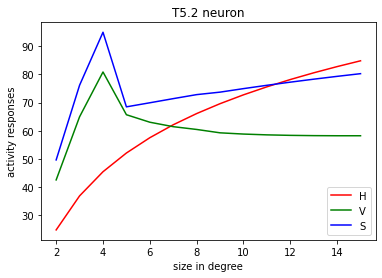

In [129]:
plot_graph(PYH_x,PYH_y,PYV_x,PYV_y,PYS_x,PYS_y,"T5.2 neuron")

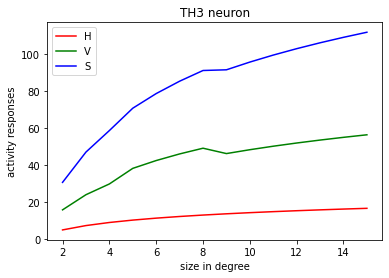

In [130]:
plot_graph(TH3H_x,TH3H_y,TH3V_x,TH3V_y,TH3S_x,TH3S_y,"TH3 neuron")